In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
from collections import defaultdict, Counter

In [2]:
with open('/app/CoNLL-2003/en/train.txt', 'r') as f:
    train_raw = f.readlines() 
print('train_raw:', len(train_raw))

train = [(ln.rstrip('\n').split(' ')[0], ln.rstrip('\n').split(' ')[-1]) for ln in train_raw[1:] if ln!='\n']
print('train:', len(train))

train_NE = [ln for ln in train if ln[-1]!='O']
print('train_NE:', len(train_NE))

train_raw: 219554
train: 204566
train_NE: 34043


In [3]:
NEs = []

ne = []
for w, tag in train_NE:
    if tag.startswith('B'):
        NEs.append(ne)
        ne = []
    ne.append(w.lower())
    
NEs[:10]

[[],
 ['eu'],
 ['german'],
 ['british'],
 ['peter', 'blackburn'],
 ['brussels'],
 ['european', 'commission'],
 ['german'],
 ['british'],
 ['germany']]

In [4]:
ctr = Counter([tuple(ne) for ne in NEs if len(ne) > 1])
filtered_NEs = [tuple(ne) for ne in NEs if len(ne) > 1 and ctr[tuple(ne)] > 10]
corpus = filtered_NEs

In [5]:
filtered_NEs

[('european', 'union'),
 ('european', 'union'),
 ('london', 'newsroom'),
 ('london', 'newsroom'),
 ('united', 'states'),
 ('west', 'bank'),
 ('yasser', 'arafat'),
 ('west', 'bank'),
 ('west', 'bank'),
 ('west', 'bank'),
 ('west', 'bank'),
 ('west', 'bank'),
 ('yasser', 'arafat'),
 ('west', 'bank'),
 ('west', 'bank'),
 ('european', 'union'),
 ('european', 'union'),
 ('south', 'africa'),
 ('south', 'africa'),
 ('new', 'york'),
 ('czech', 'republic'),
 ('the', 'oval'),
 ('waqar', 'younis'),
 ('mushtaq', 'ahmed'),
 ('saeed', 'anwar'),
 ('waqar', 'younis'),
 ('mushtaq', 'ahmed'),
 ('wasim', 'akram'),
 ('wasim', 'akram'),
 ('waqar', 'younis'),
 ('mushtaq', 'ahmed'),
 ('aamir', 'sohail'),
 ('aamir', 'sohail'),
 ('saeed', 'anwar'),
 ('ijaz', 'ahmed'),
 ('salim', 'malik'),
 ('wasim', 'akram'),
 ('mushtaq', 'ahmed'),
 ('waqar', 'younis'),
 ('manchester', 'united'),
 ('world', 'cup'),
 ('the', 'oval'),
 ('manchester', 'united'),
 ('manchester', 'united'),
 ('canadian', 'open'),
 ('canadian', 'ope

In [6]:
Counter(filtered_NEs).most_common()

[(('new', 'york'), 139),
 (('hong', 'kong'), 59),
 (('south', 'africa'), 57),
 (('united', 'states'), 55),
 (('czech', 'republic'), 54),
 (('sri', 'lanka'), 43),
 (('new', 'zealand'), 41),
 (('los', 'angeles'), 34),
 (('west', 'bank'), 32),
 (('u.s.', 'open'), 31),
 (('wasim', 'akram'), 30),
 (('san', 'francisco'), 29),
 (('world', 'cup'), 28),
 (('kansas', 'city'), 28),
 (('san', 'diego'), 28),
 (('waqar', 'younis'), 25),
 (('mushtaq', 'ahmed'), 25),
 (('st', 'louis'), 25),
 (('major', 'league'), 23),
 (('costa', 'rica'), 23),
 (('sao', 'paulo'), 21),
 (('european', 'union'), 20),
 (('mother', 'teresa'), 20),
 (('aamir', 'sohail'), 19),
 (('bill', 'clinton'), 19),
 (('american', 'league'), 18),
 (('national', 'league'), 18),
 (('south', 'african'), 17),
 (('saeed', 'anwar'), 16),
 (('eastern', 'division'), 16),
 (('central', 'division'), 16),
 (('western', 'division'), 16),
 (('ajax', 'amsterdam'), 16),
 (('the', 'oval'), 15),
 (('south', 'korean'), 15),
 (('ijaz', 'ahmed'), 14),
 (('

In [7]:
# Do a word count
word_count = defaultdict(int)

for ne in corpus:
    words = ne
    for w in words:
        word_count[w] += 1
        
sorted_words = sorted(list(word_count.items()), key=lambda x: x[1], reverse=True)
sorted_words

[('new', 193),
 ('york', 139),
 ('south', 89),
 ('united', 82),
 ('league', 59),
 ('hong', 59),
 ('kong', 59),
 ('africa', 57),
 ('san', 57),
 ('states', 55),
 ('czech', 54),
 ('republic', 54),
 ('st', 50),
 ('division', 48),
 ('open', 44),
 ('sri', 43),
 ('lanka', 43),
 ('zealand', 41),
 ('ahmed', 39),
 ('city', 39),
 ('los', 34),
 ('angeles', 34),
 ('west', 32),
 ('bank', 32),
 ('u.s.', 31),
 ('wasim', 30),
 ('akram', 30),
 ('francisco', 29),
 ('world', 28),
 ('cup', 28),
 ('kansas', 28),
 ('diego', 28),
 ('waqar', 25),
 ('younis', 25),
 ('mushtaq', 25),
 ('louis', 25),
 ('grand', 24),
 ('newsroom', 23),
 ('major', 23),
 ('costa', 23),
 ('rica', 23),
 ('sao', 21),
 ('paulo', 21),
 ('european', 20),
 ('union', 20),
 ('mother', 20),
 ('teresa', 20),
 ('aamir', 19),
 ('sohail', 19),
 ('bill', 19),
 ('clinton', 19),
 ('american', 18),
 ('national', 18),
 ('african', 17),
 ('saeed', 16),
 ('anwar', 16),
 ('eastern', 16),
 ('central', 16),
 ('western', 16),
 ('ajax', 16),
 ('amsterdam', 16

In [8]:
word_set = [w for w,c in sorted_words]
word_set

['new',
 'york',
 'south',
 'united',
 'league',
 'hong',
 'kong',
 'africa',
 'san',
 'states',
 'czech',
 'republic',
 'st',
 'division',
 'open',
 'sri',
 'lanka',
 'zealand',
 'ahmed',
 'city',
 'los',
 'angeles',
 'west',
 'bank',
 'u.s.',
 'wasim',
 'akram',
 'francisco',
 'world',
 'cup',
 'kansas',
 'diego',
 'waqar',
 'younis',
 'mushtaq',
 'louis',
 'grand',
 'newsroom',
 'major',
 'costa',
 'rica',
 'sao',
 'paulo',
 'european',
 'union',
 'mother',
 'teresa',
 'aamir',
 'sohail',
 'bill',
 'clinton',
 'american',
 'national',
 'african',
 'saeed',
 'anwar',
 'eastern',
 'central',
 'western',
 'ajax',
 'amsterdam',
 'the',
 'oval',
 'korean',
 'ijaz',
 'nations',
 'pauli',
 'wall',
 'street',
 'salim',
 'malik',
 'manchester',
 'canadian',
 'psv',
 'eindhoven',
 'boris',
 'yeltsin',
 'delhi',
 'prix',
 'saudi',
 'arabia',
 'yasser',
 'arafat',
 'sydney',
 'buenos',
 'aires',
 'moin',
 'khan',
 'white',
 'house',
 'london',
 'slam',
 'alexander',
 'lebed',
 'hansa',
 'rostoc

In [9]:
Vocab = {}
Vocab['w2i']={w:i for i, w in enumerate(word_set)}
Vocab['i2w']={i:w for i, w in enumerate(word_set)}

In [10]:
count_table = np.zeros((len(word_set), len(word_set)))

for ne in corpus:
    words = ne
    for w1, w2 in itertools.combinations(words, 2):
        count_table[Vocab['w2i'][w1], Vocab['w2i'][w2]] += 1
        count_table[Vocab['w2i'][w2], Vocab['w2i'][w1]] += 1

count_table

array([[  0., 139.,   0., ...,   0.,   0.,   0.],
       [139.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,  11.],
       [  0.,   0.,   0., ...,   0.,  11.,   0.]])

In [11]:
xy = count_table/np.sum(count_table)

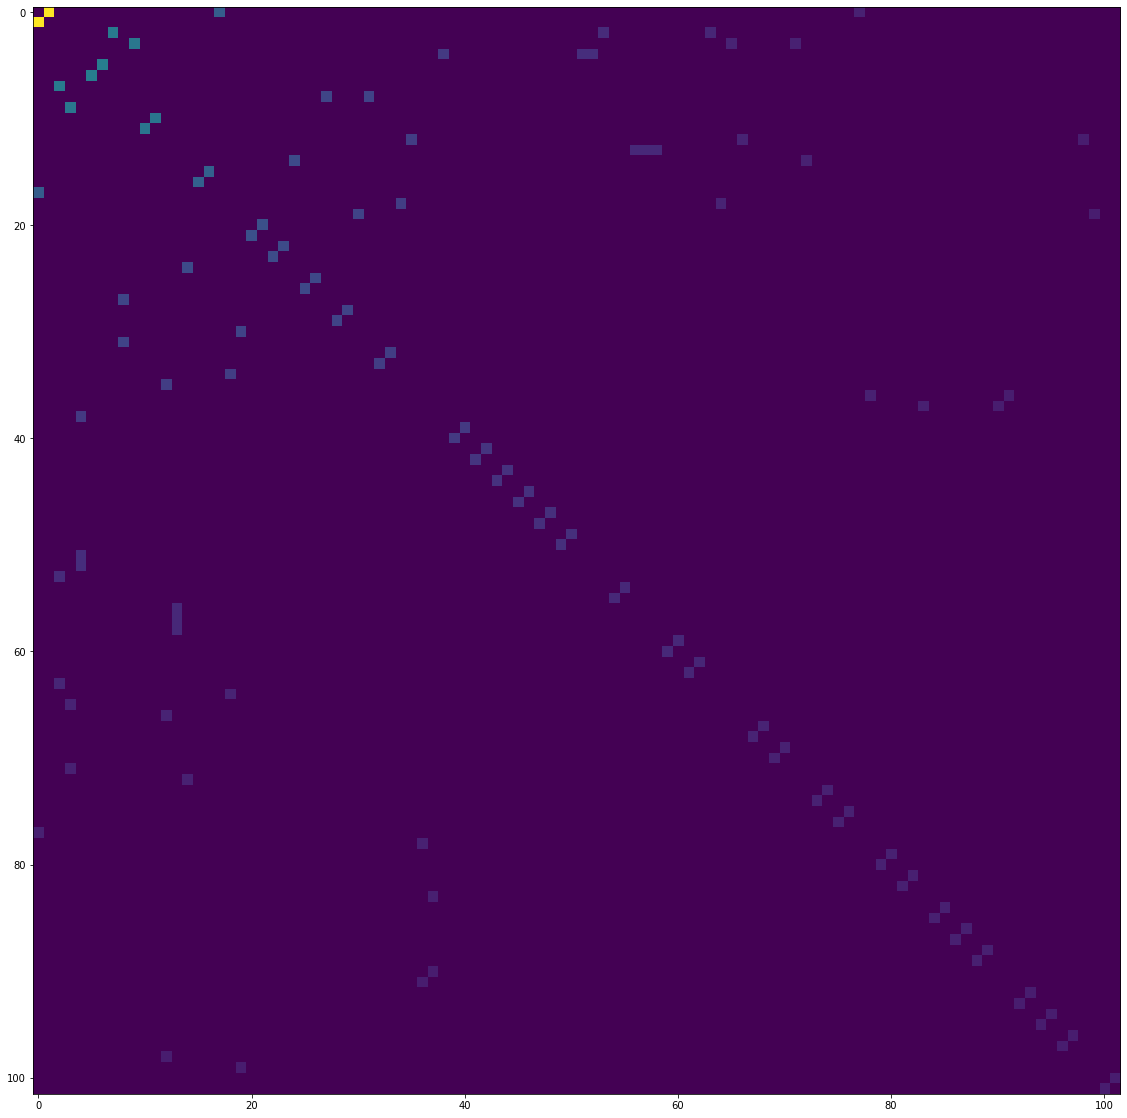

In [12]:
plt.figure(figsize = (20,20))
plt.imshow(xy)

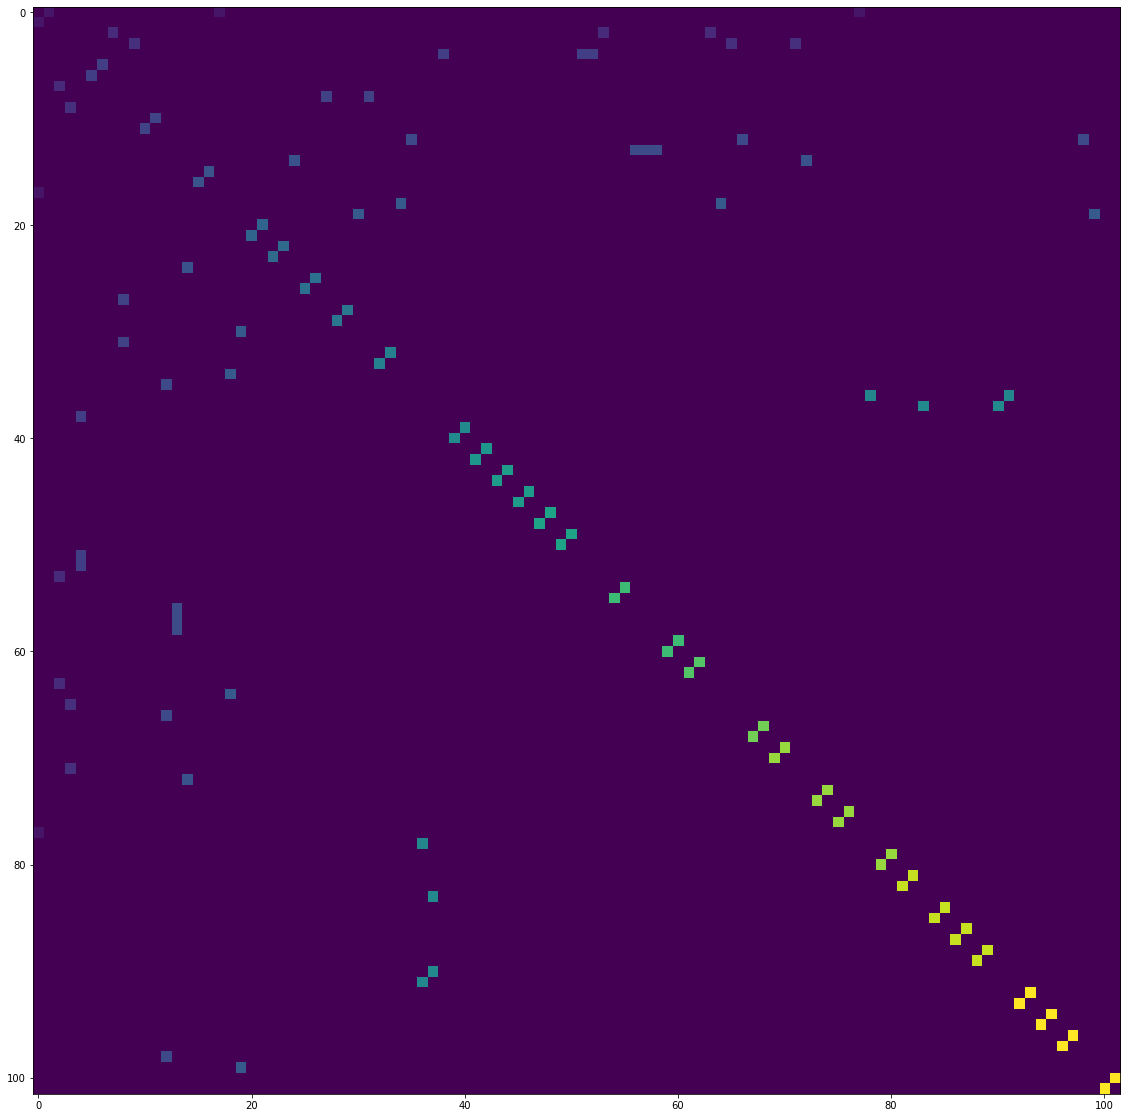

In [13]:
x = np.sum(xy,0)
y = np.sum(xy,1)
xyind = y[None].T @ x[None]
plt.figure(figsize = (20,20))
plt.imshow(xy/xyind)

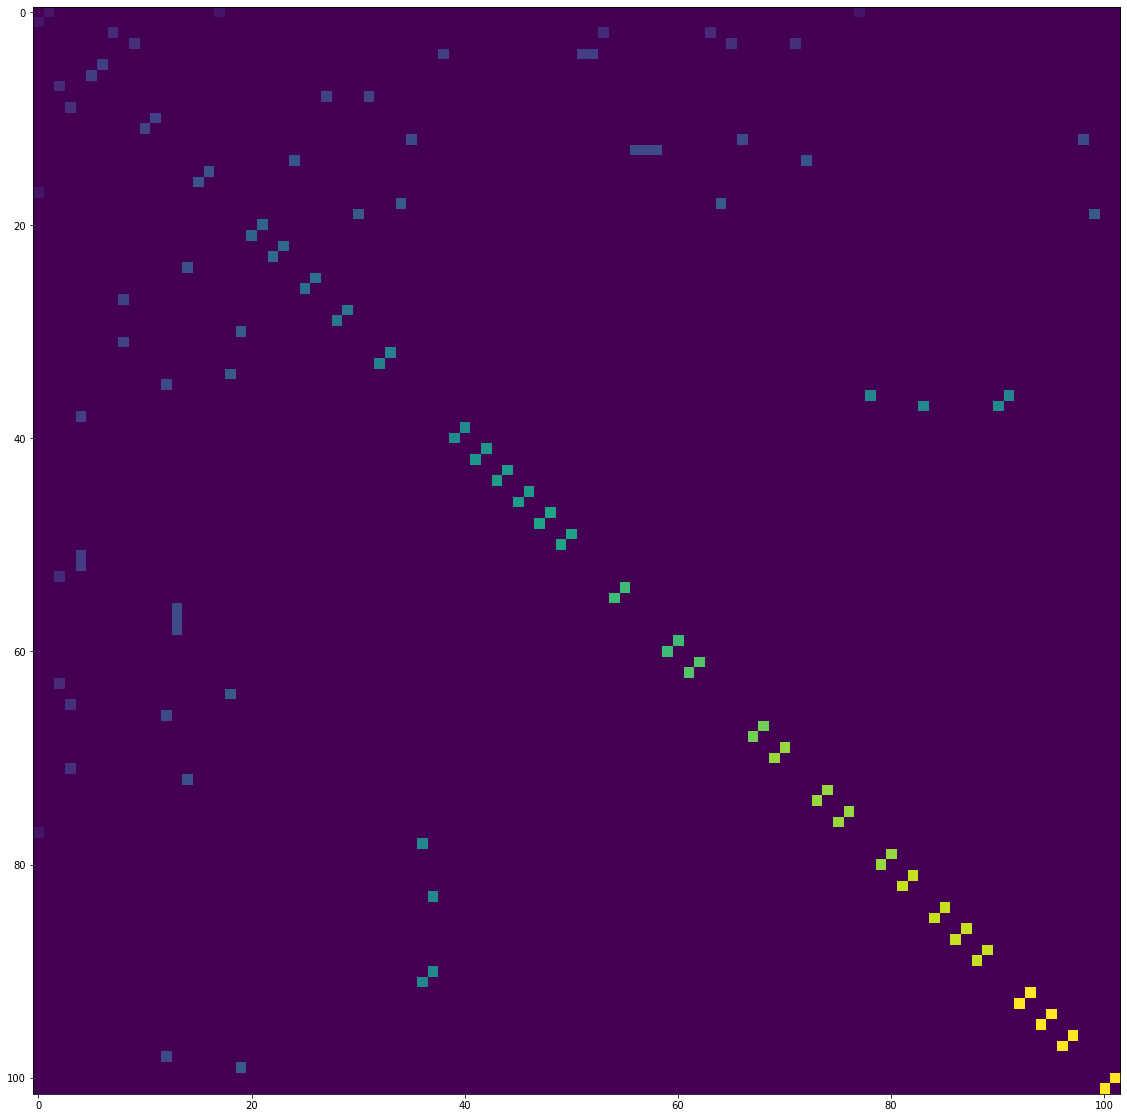

In [62]:
plt.figure(figsize = (20,20))
plt.imshow(xy/x.reshape(-1,1)/y.reshape(1,-1))

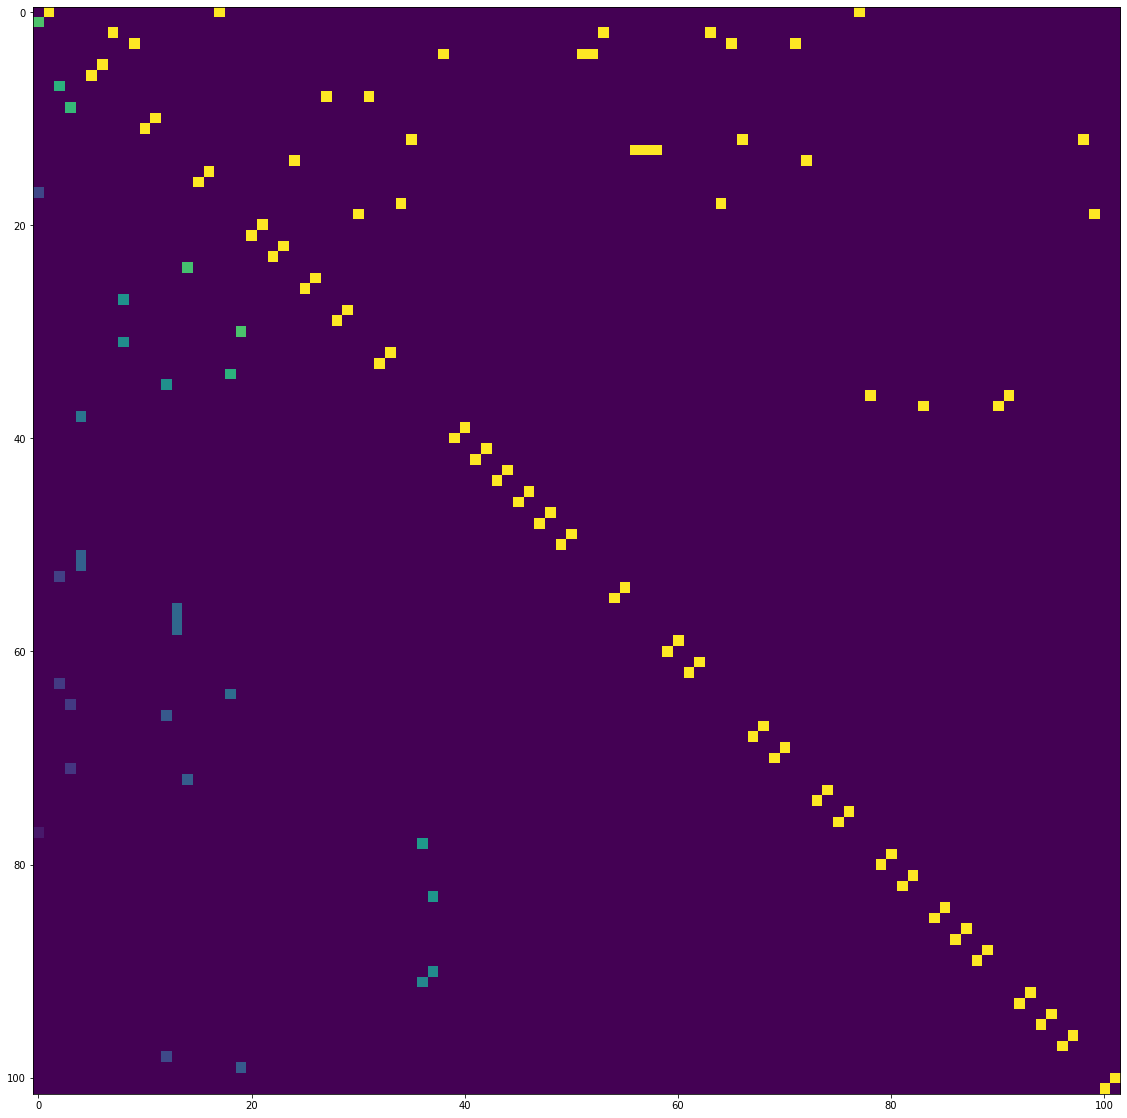

In [63]:
plt.figure(figsize = (20,20))
plt.imshow(xy/y.reshape(1,-1))

In [54]:
np.sum(count_table)

2758.0

In [61]:
y.reshape(1,-1)

array([[0.06997825, 0.05039884, 0.03226976, 0.02973169, 0.02139231,
        0.02139231, 0.02139231, 0.02066715, 0.02066715, 0.01994199,
        0.01957941, 0.01957941, 0.01812908, 0.01740392, 0.01595359,
        0.01559101, 0.01559101, 0.01486584, 0.01414068, 0.01414068,
        0.01232777, 0.01232777, 0.01160261, 0.01160261, 0.01124003,
        0.01087745, 0.01087745, 0.01051487, 0.01015228, 0.01015228,
        0.01015228, 0.01015228, 0.00906454, 0.00906454, 0.00906454,
        0.00906454, 0.00870196, 0.00833938, 0.00833938, 0.00833938,
        0.00833938, 0.00761421, 0.00761421, 0.00725163, 0.00725163,
        0.00725163, 0.00725163, 0.00688905, 0.00688905, 0.00688905,
        0.00688905, 0.00652647, 0.00652647, 0.00616389, 0.00580131,
        0.00580131, 0.00580131, 0.00580131, 0.00580131, 0.00580131,
        0.00580131, 0.00543872, 0.00543872, 0.00543872, 0.00507614,
        0.00507614, 0.00507614, 0.00507614, 0.00507614, 0.00471356,
        0.00471356, 0.00471356, 0.00471356, 0.00